In [440]:
include("src/cvar.jl")
include("data/data_14bus_pu.jl")
sys14_f = PowerSystem(nodes14, generators14_f, loads14, branches14, nothing,  100.0);
sys14_r = PowerSystem(nodes14, generators14_r, loads14, branches14, nothing,  100.0);

┌ Info: Ramp defined as nothing for Bus1
└ @ PowerSystems /Users/jdlara/.julia/packages/PowerSystems/ceRun/src/utils/IO/system_checks.jl:121
┌ Info: Ramp defined as nothing for Bus2
└ @ PowerSystems /Users/jdlara/.julia/packages/PowerSystems/ceRun/src/utils/IO/system_checks.jl:121
┌ Info: Ramp defined as nothing for Bus6
└ @ PowerSystems /Users/jdlara/.julia/packages/PowerSystems/ceRun/src/utils/IO/system_checks.jl:121
┌ Info: Ramp defined as nothing for Bus1
└ @ PowerSystems /Users/jdlara/.julia/packages/PowerSystems/ceRun/src/utils/IO/system_checks.jl:121
┌ Info: Ramp defined as nothing for Bus2
└ @ PowerSystems /Users/jdlara/.julia/packages/PowerSystems/ceRun/src/utils/IO/system_checks.jl:121
┌ Info: Ramp defined as nothing for Bus6
└ @ PowerSystems /Users/jdlara/.julia/packages/PowerSystems/ceRun/src/utils/IO/system_checks.jl:121


In [441]:
model_f = solve_ed(sys14_f, ipopt_optimizer);
model_r = solve_ed(sys14_r, ipopt_optimizer);

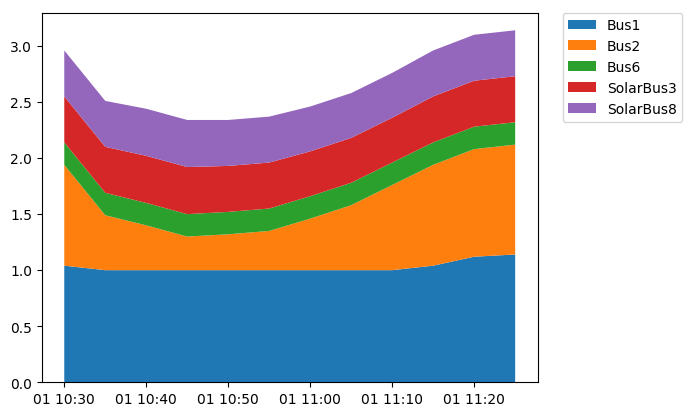

In [442]:
stackplot(dates, model_r[1]["Pth"].Bus1, 
                model_r[1]["Pth"].Bus2, 
                model_r[1]["Pth"].Bus6,
                model_r[1]["Pre"].SolarBus3,
                model_r[1]["Pre"].SolarBus8,labels = [g.name for g in generators14]);
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

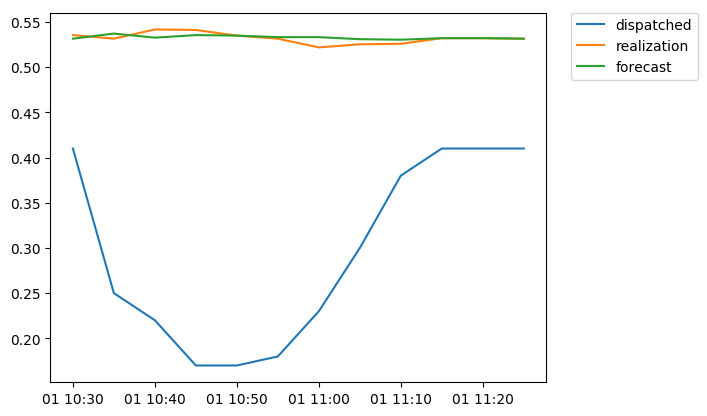

In [443]:
plot(dates, model_f[1]["Pre"].SolarBus3, label = "dispatched")
plot(dates, solar_ts_ed*0.65, label = "realization")
plot(dates, solar_ts_fr*0.65, label = "forecast")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

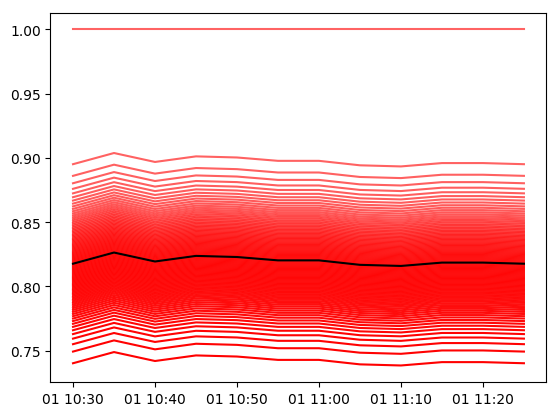

In [444]:
prob_forecast = add_probabilistc(solar_ts_fr);
for s = 1:100
    trajectory = [val[s] for val in prob_forecast]
    plot(dates,trajectory, color = "red", alpha = s);
end
plot(dates, solar_ts_fr, color = "black");

In [445]:
cvar_mod = solve_cvar_ed(sys14_f, prob_forecast, ipopt_optimizer);

In [446]:
d = Dict{String, Any}()
d["Pth"] = create_result_dict(cvar_mod.variables["Pth"])

arr_rhs = Array{Float64,1}()
arr_lhs = Array{Float64,1}()
for t in 1:12
     push!(arr_rhs, round(JuMP.value(cvar_mod.variables["delta_rhs"][t]), digits=2))
     push!(arr_lhs, round(JuMP.value(cvar_mod.variables["delta_lhs"][t]), digits=2))
end

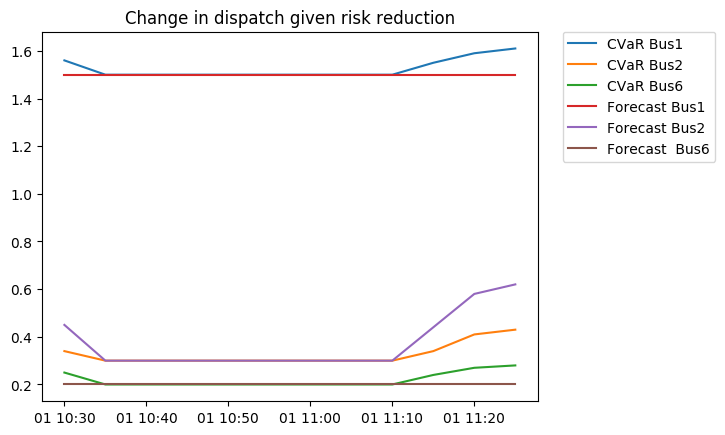

PyObject Text(0.5, 1.0, 'Change in dispatch given risk reduction')

In [450]:
plot(dates, d["Pth"]["Bus1"], label = "CVaR Bus1")
plot(dates, d["Pth"]["Bus2"], label = "CVaR Bus2")
plot(dates, d["Pth"]["Bus6"], label = "CVaR Bus6")
plot(dates, model_f[1]["Pth"].Bus1, label = "Forecast Bus1")
plot(dates,  model_f[1]["Pth"].Bus2, label = "Forecast Bus2")
plot(dates, model_f[1]["Pth"].Bus6, label = "Forecast  Bus6")
#plot(dates, model_r[1]["Pth"].Bus1, label = "Real Bus1")
#plot(dates,  model_r[1]["Pth"].Bus2, label = "Real Bus2")
#plot(dates, model_r[1]["Pth"].Bus6, label = "Real  Bus6")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
title("Change in dispatch given risk reduction")

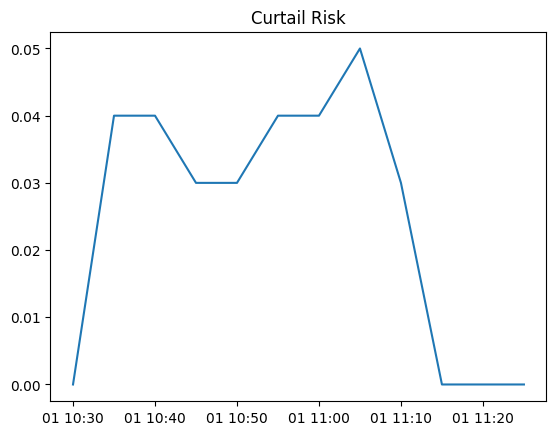

PyObject Text(0.5, 1.0, 'Curtail Risk')

In [451]:
plot(dates,arr_rhs)
title("Curtail Risk")

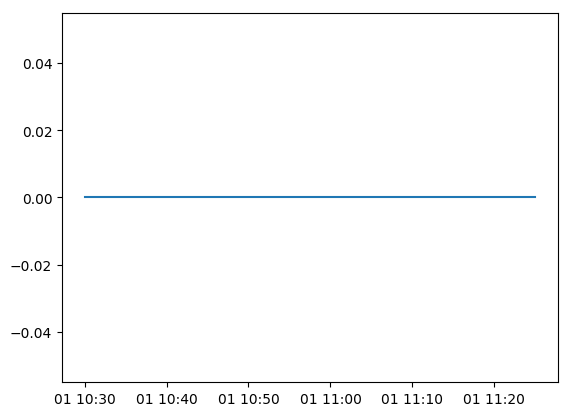

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x15e7f78d0>

In [449]:
plot(dates,arr_lhs)